# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [440]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [441]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [442]:
info = df.info()               # Todos os números estão como inteiros, e estão corretos
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB
None


In [443]:
dados_faltantes = df.isnull().sum()      # Sem dados faltantes
print(dados_faltantes)

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [444]:
informacoes = df.describe()                # Todas colunas parecem ter outliers, alguns mais moderados e outros mais fortes
print(informacoes)

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000     2.00000  
max   

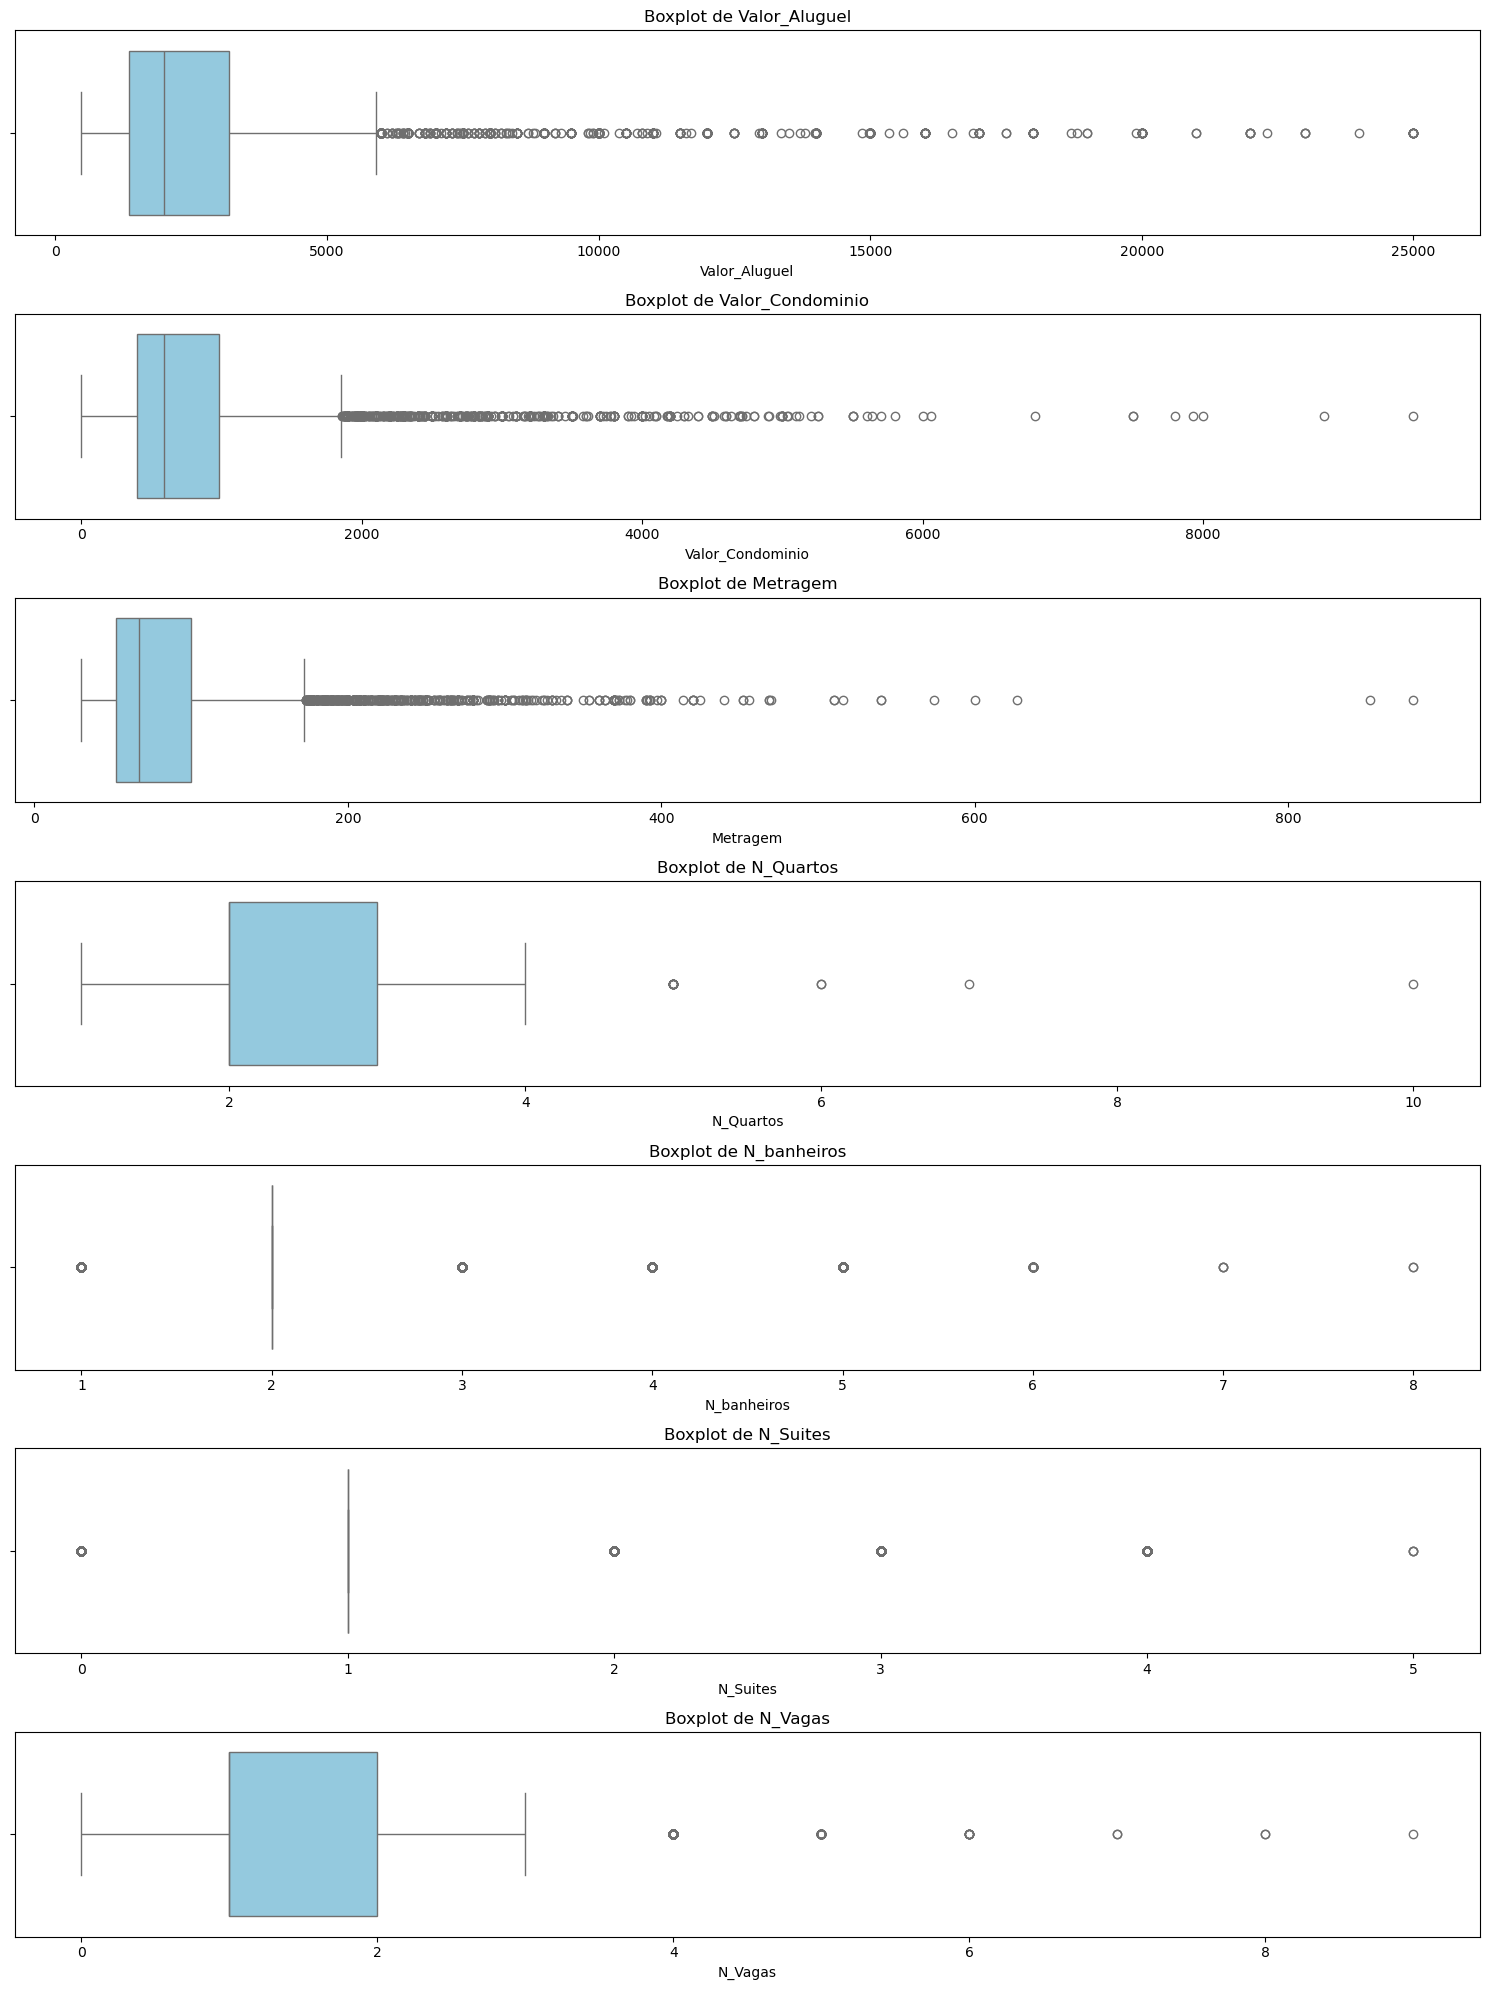

In [445]:
colunas = [                                        # Usando boxplot para visualizar melhor possíveis outliers
    "Valor_Aluguel",
    "Valor_Condominio",
    "Metragem",
    "N_Quartos",
    "N_banheiros",
    "N_Suites",
    "N_Vagas"
]

plt.figure(figsize=(15, 20))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)  
    sns.boxplot(data=df, x=coluna, color="skyblue")
    plt.title(f"Boxplot de {coluna}", fontsize=12)
    plt.tight_layout()

plt.show()

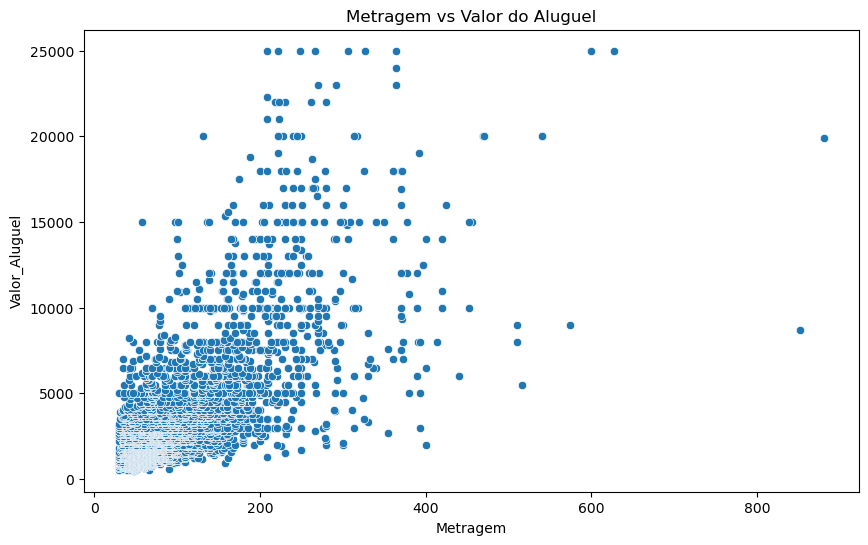

In [446]:
plt.figure(figsize=(10,6))   # Existe uma tendência positiva, quanto maior a metragem, maior tende a ser o valor do aluguel. Mas ainda os valores distorcem muito da média
sns.scatterplot(data=df, x="Metragem", y="Valor_Aluguel")
plt.title("Metragem vs Valor do Aluguel")
plt.show()

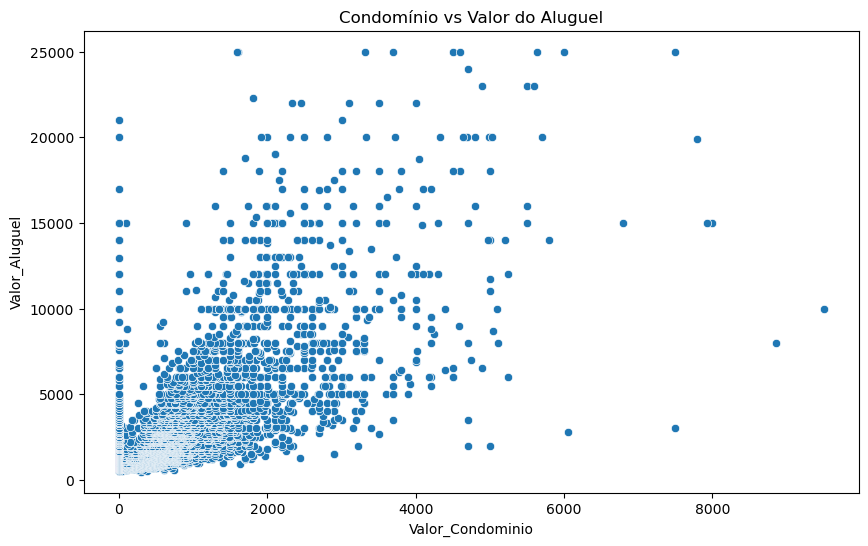

In [447]:
plt.figure(figsize=(10,6))   # Há casos de condomínio alto com aluguel mediano
sns.scatterplot(data=df, x="Valor_Condominio", y="Valor_Aluguel")
plt.title("Condomínio vs Valor do Aluguel")
plt.show()

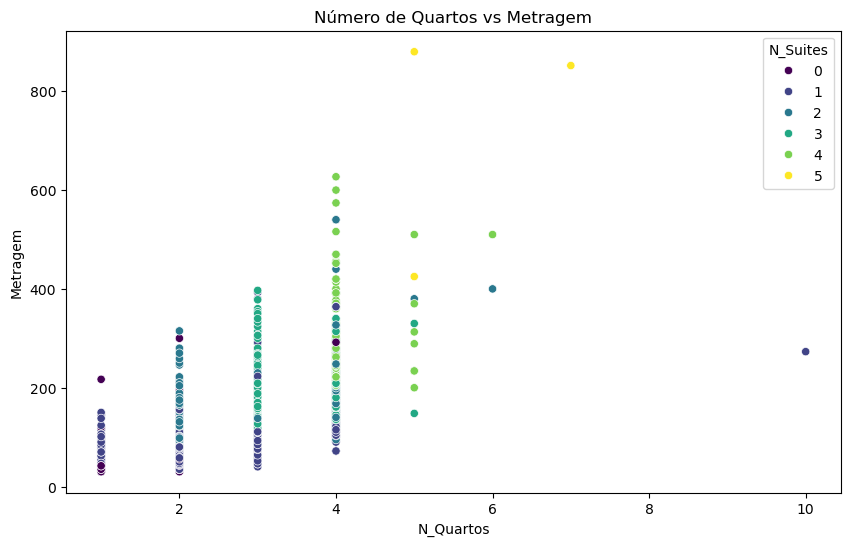

In [448]:
plt.figure(figsize=(10,6))   # Os pontos fora da curva (muitos quartos mas metragem baixa) podem indicar erro
sns.scatterplot(data=df, x="N_Quartos", y="Metragem", hue="N_Suites", palette="viridis")
plt.title("Número de Quartos vs Metragem")
plt.show()

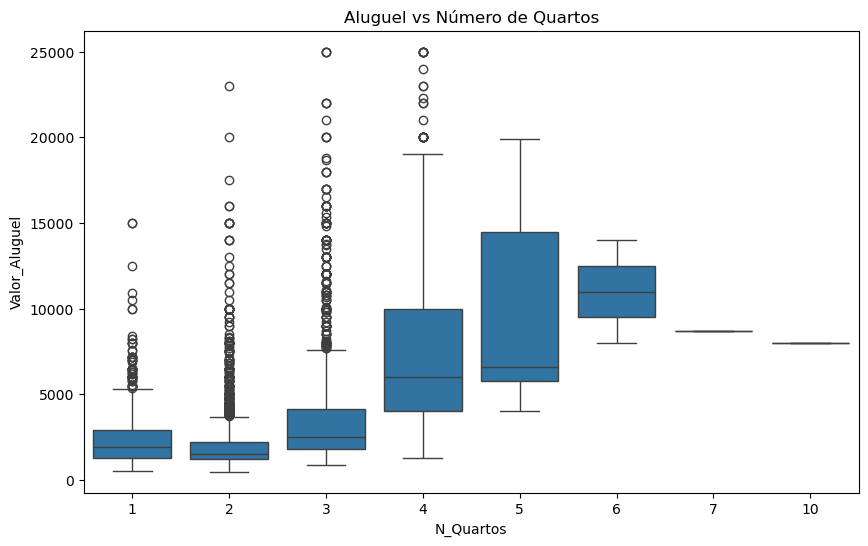

In [449]:
plt.figure(figsize=(10,6))   # O valor do aluguel cresce com o nº de quartos, mas há sobreposição, alguns de 2 quartos estão com o valor muito acima da média, pode conter outros fatores como localização
sns.boxplot(data=df, x="N_Quartos", y="Valor_Aluguel")
plt.title("Aluguel vs Número de Quartos")
plt.show()

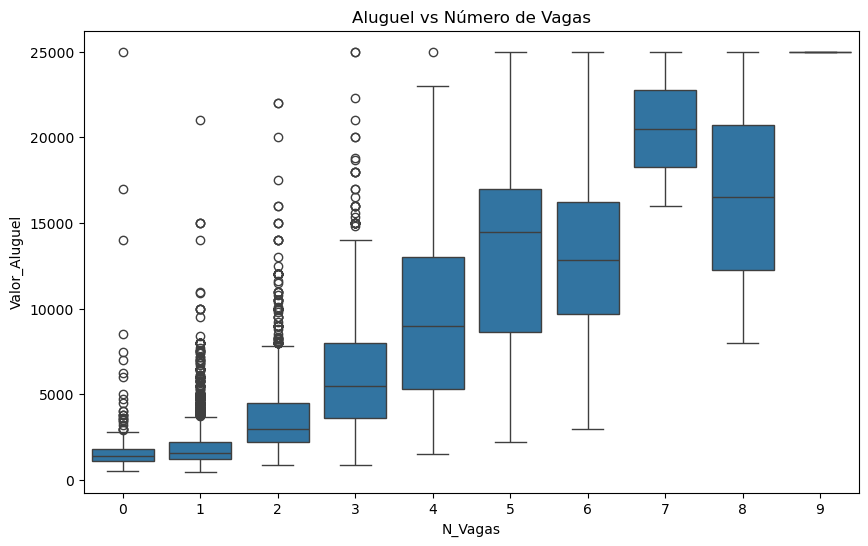

In [450]:
plt.figure(figsize=(10,6))   # O número de vagas aumenta conforme o valor de aluguel, mas tem casos onde um aluguel acima padrão tem 1 vaga ou nenhuma, sendo um valor muito discrepante da realidade
sns.boxplot(data=df, x="N_Vagas", y="Valor_Aluguel")
plt.title("Aluguel vs Número de Vagas")
plt.show()

In [451]:
# Se eu optasse por exclusão de dados de tal coluna iria ter de repetir o mesmo processo em todas, pois todas contém outliers.
# se eu optasse por substituição eu acho que os valores ficariam confusos, pois neste caso eu não tenho como ir mais a fundo e descobrir se realmente esses valores condizem com a realidade.
# Como fiquei confusa com essas duas situações, pesquisei possibilidades, e descobri essa opção de impor limites, não me recordo de ter visto na aula, achei uma alternativa interessante para esse caso.

limites = {
    "Valor_Aluguel": 15000,      
    "Valor_Condominio": 5000,     
    "Metragem": 300,             
    "N_Quartos": 6,               
    "N_banheiros": 6,             
    "N_Vagas": 5                  
}

for coluna, limite in limites.items():
    df = df[df[coluna] <= limite]

df = df.reset_index(drop=True)

df_limpo = df.copy()

print(df.describe())

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7055.000000       7055.000000  7055.000000  7055.000000  7055.000000   
mean     2726.187101        754.235436    83.439830     2.269738     2.048901   
std      2293.491328        649.733133    48.484995     0.797082     0.919663   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1342.500000        390.000000    51.000000     2.000000     2.000000   
50%      1900.000000        583.000000    66.000000     2.000000     2.000000   
75%      3030.000000        940.000000    96.000000     3.000000     2.000000   
max     15000.000000       5000.000000   300.000000     5.000000     6.000000   

          N_Suites      N_Vagas  
count  7055.000000  7055.000000  
mean      0.972644     1.392204  
std       0.815198     0.779465  
min       0.000000     0.000000  
25%       1.000000     1.000000  
50%       1.000000     1.000000  
75%       1.000000     2.000000 

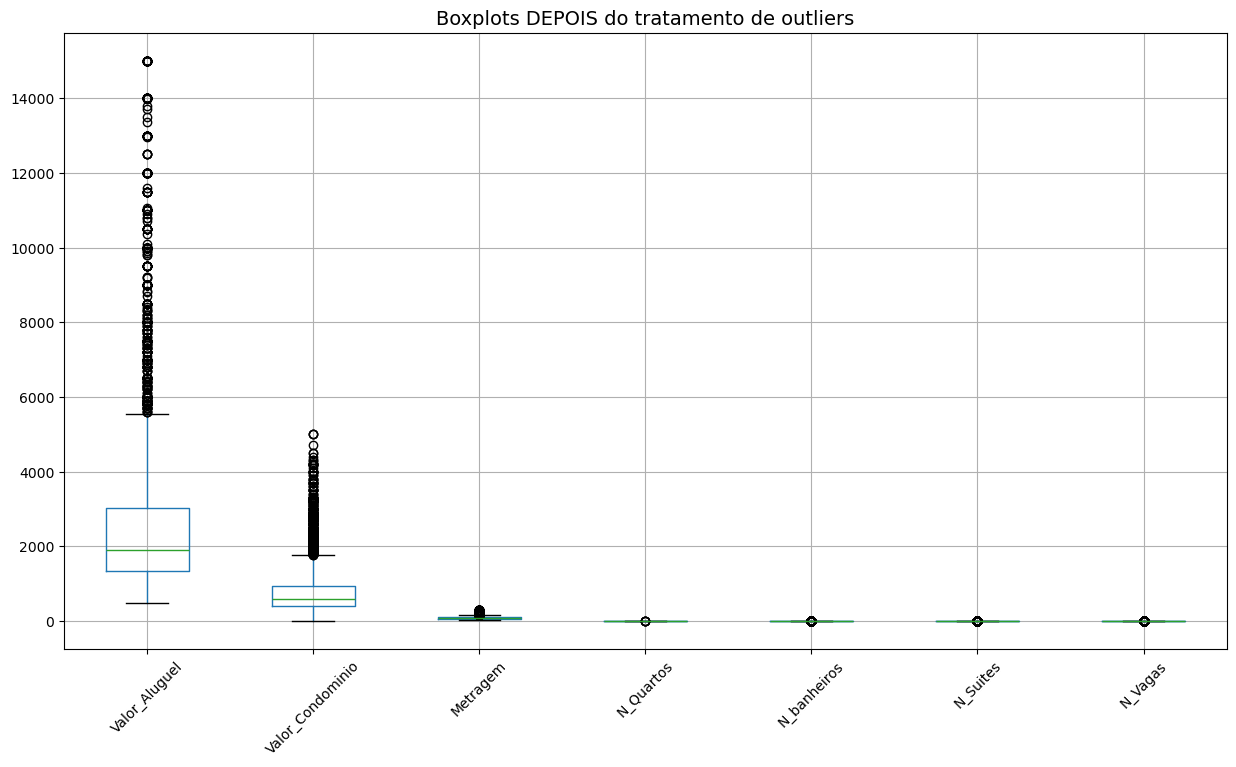

In [452]:
for coluna, limite in limites.items():
    df_limpo = df_limpo[df_limpo[coluna] <= limite]

df_limpo = df_limpo.reset_index(drop=True)

plt.figure(figsize=(15, 8))
df_limpo[colunas].boxplot()
plt.title("Boxplots DEPOIS do tratamento de outliers", fontsize=14)
plt.xticks(rotation=45)
plt.show()

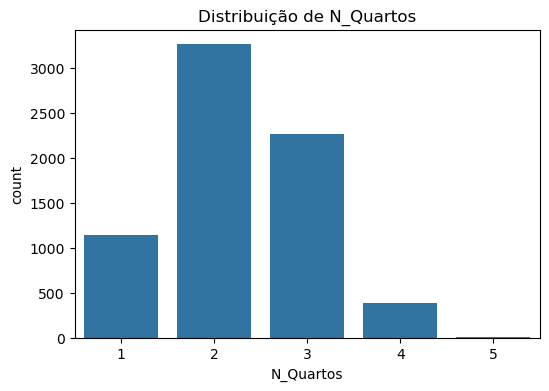

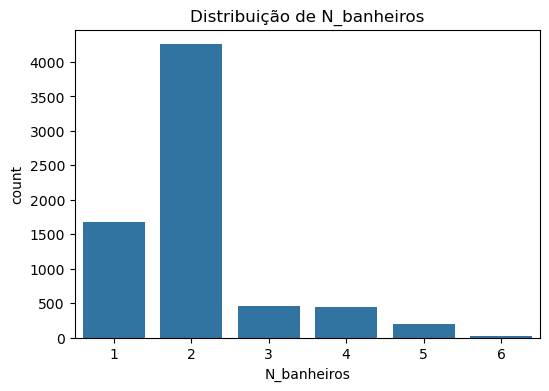

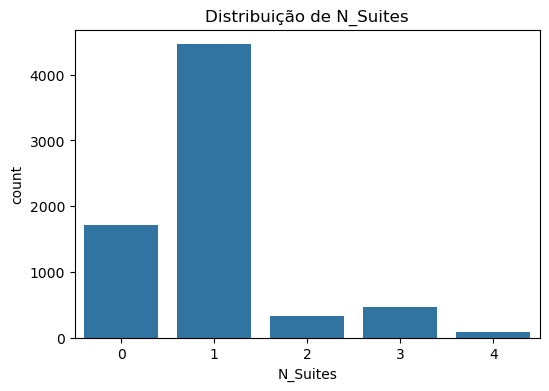

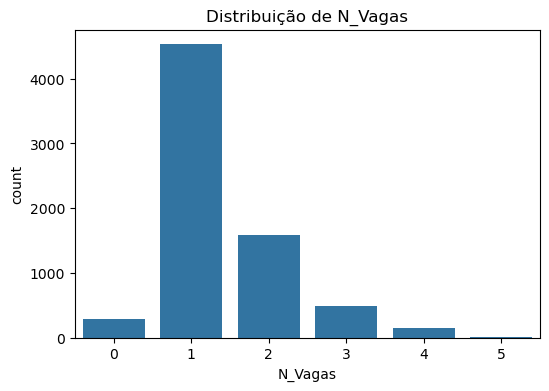

In [453]:
cols_discretas = ['N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']

for col in cols_discretas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Distribuição de {col}')
    plt.show()

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




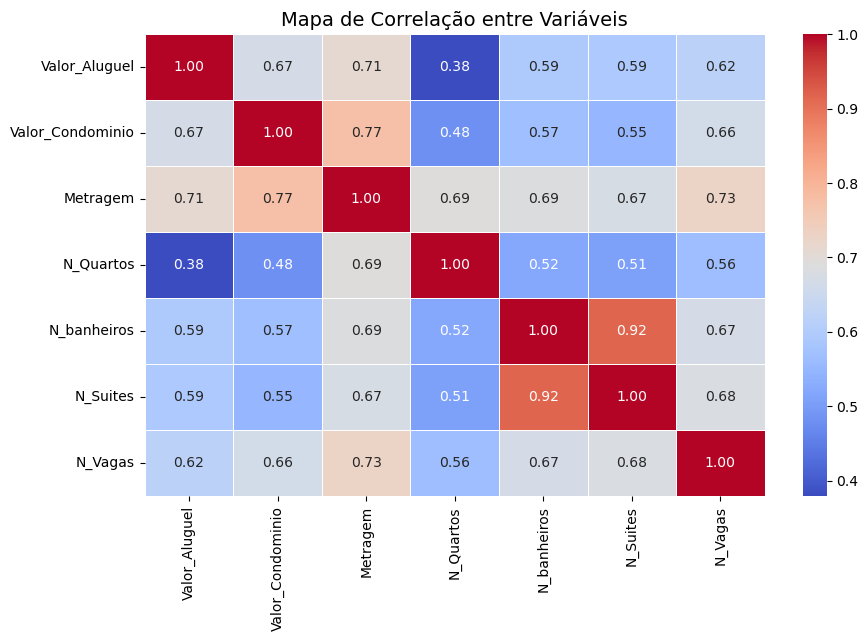

In [454]:
cols = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem',
        'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']

# matriz de correlação
corr = df[cols].corr()

# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis", fontsize=14)
plt.show()

In [455]:
correlacoes = df.corr()['Valor_Aluguel'].drop('Valor_Aluguel')
variaveis_fortes = correlacoes[correlacoes.abs() > 0.7].index.tolist()
variaveis_medianas = correlacoes[correlacoes.abs() > 0.5].index.tolist()


print("Variáveis fortes:", variaveis_fortes)
print("Variáveis moderadas+fortes:", variaveis_medianas)

Variáveis fortes: ['Metragem']
Variáveis moderadas+fortes: ['Valor_Condominio', 'Metragem', 'N_banheiros', 'N_Suites', 'N_Vagas']



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [456]:
X = df[['Metragem']] 
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)

Tamanho do treino: (5644, 1)
Tamanho do teste: (1411, 1)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [457]:
X = df[['Metragem']]       # feature
y = df['Valor_Aluguel']    # target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [458]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [459]:
print(f"Intercepto (valor base do aluguel): {modelo.intercept_:.2f}")

Intercepto (valor base do aluguel): -45.75


In [460]:
print(f"Coeficiente (quanto o valor muda por m²): {modelo.coef_[0]:.2f}")

Coeficiente (quanto o valor muda por m²): 33.06


Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [461]:
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = modelo.score(X_test, y_test)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1588.92
R²: 0.52


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

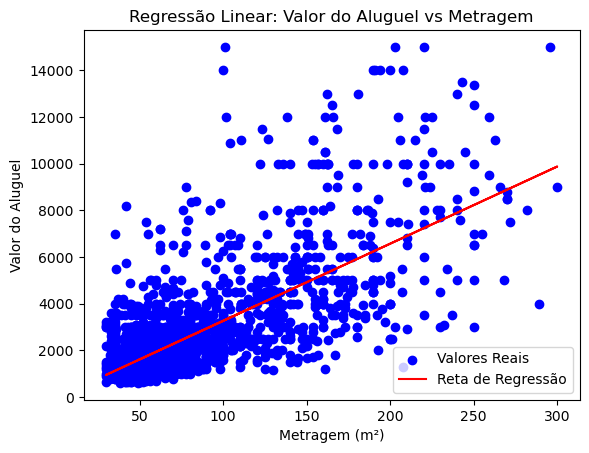

In [462]:
plt.scatter(X_test, y_test, color='blue', label='Valores Reais')

plt.plot(X_test, y_pred, color='red', label='Reta de Regressão')

plt.title("Regressão Linear: Valor do Aluguel vs Metragem")
plt.xlabel("Metragem (m²)")
plt.ylabel("Valor do Aluguel")
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [463]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [464]:
previsoes = modelo.predict(X_test)

r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5172969295985217


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

In [465]:
# Insight: Embora o modelo consiga capturar parte da relação entre metragem e valor do aluguel, ainda há 48% da variação não explicada, sugerindo que seria interessante incluir outras variáveis (como número de quartos, localização, condomínio, etc.) para melhorar a previsão.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [466]:
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]       
y = df['Valor_Aluguel']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [467]:
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [468]:
y_train_pred = modelo_multi.predict(X_train)
r2_train = modelo_multi.score(X_train, y_train)

print(f"R² no treino: {r2_train:.2f}")

R² no treino: 0.58


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [470]:
X_test = X_test[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]

y_test_pred = modelo_multi.predict(X_test)

r2_test = modelo_multi.score(X_test, y_test)

print(f"R² na base de teste: {r2_test:.2f}")

R² na base de teste: 0.62


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

In [ ]:
# R² de 0,52 significa que 52% da variação do aluguel é explicada apenas pela metragem
# R² de 0,62 significa que 62% da variação é explicada quando consideramos todas as variáveis

# A regressão múltipla é melhor porque inclui mais informações relevantes.

# Isso ocorreu porque o valor do aluguel não depende só da metragem: número de quartos, suítes, vagas e condomínio também influenciam. Ao incluir essas variáveis, o modelo consegue capturar mais detalhes do preço, aumentando o R².